<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score   #1 predict , they are affected in disease and 0 represent, they are doesn't affect

# **Data Collection & Processing**

In [134]:
# load the data from csv file to Pandas DataFrame
heart_disease = pd.read_csv('/content/heart.csv')

In [135]:
# printing the first 5 rows of the dataframe
heart_disease .head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [136]:
# number of rows and Columns
heart_disease.shape

(1025, 14)

In [137]:
# getting some informations about the data
heart_disease .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [138]:
# check the number of missing values in each column
heart_disease .isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [143]:
heart_disease .isnull().values.any() # check any missing values, if it have missing values its return True

False

# **Data Analysis**

In [139]:
# getting some statistical measures about the data
heart_disease .describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [140]:
# finding the number of people survived and not survived
heart_disease['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# **Data Visualization**

In [141]:
sns.set()

<Axes: xlabel='target', ylabel='count'>

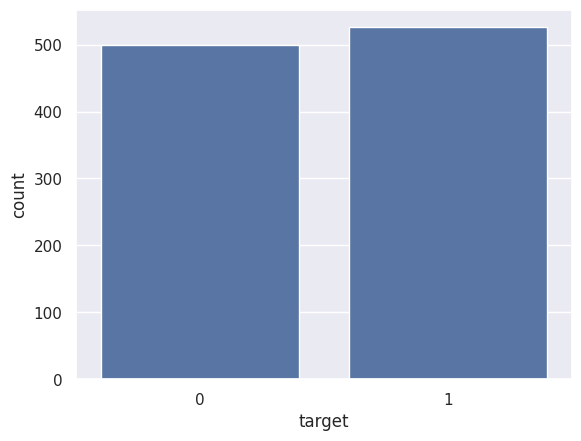

In [144]:
# making a count plot for "Target" column
import seaborn as sns
sns.countplot(x='target', data=heart_disease )


In [146]:
heart_disease['sex'].value_counts()

sex
1    713
0    312
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

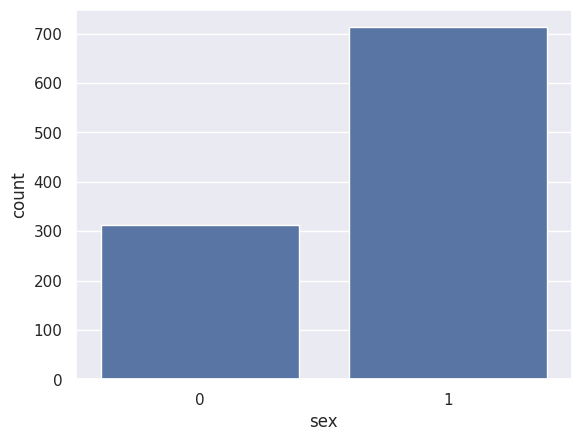

In [148]:
import seaborn as sns

sns.countplot(x='sex', data=heart_disease)


<Axes: xlabel='sex', ylabel='count'>

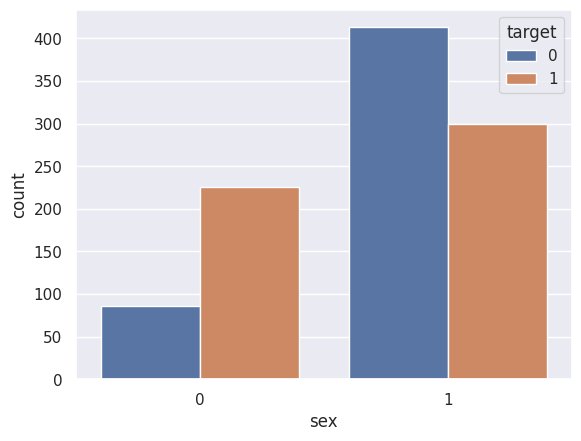

In [149]:
# number of target Gender wise
sns.countplot(x='sex', hue='target', data=heart_disease )

<Axes: xlabel='age', ylabel='count'>

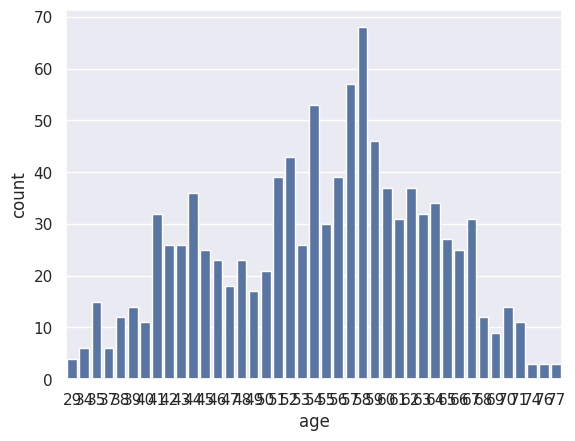

In [152]:
# making a count plot for "age" column
sns.countplot(x='age', data=heart_disease)

<Axes: xlabel='age', ylabel='count'>

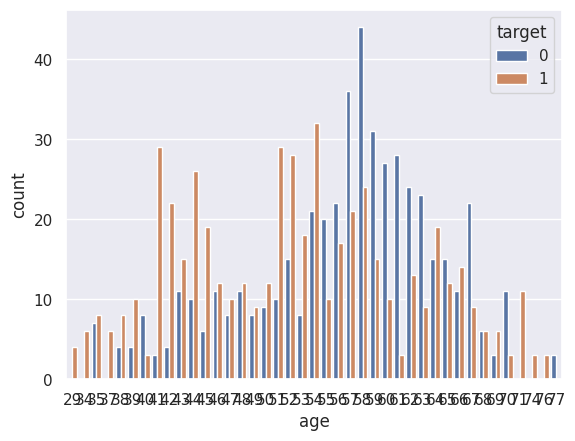

In [153]:
sns.countplot(x='age', hue='target', data=heart_disease)

<Axes: ylabel='age'>

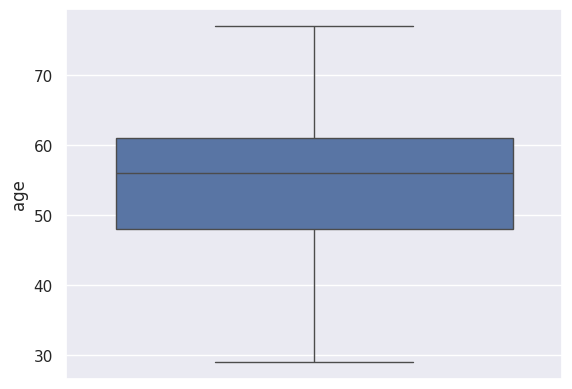

In [154]:
# Finding Outlier
sns.boxplot(heart_disease .age)

# **Encoding the Categorical Columns**

There is no more missing values and categorical values

# **Separating features & Target**

In [156]:
print(heart_disease .columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [170]:
X = heart_disease.drop(columns = ['target'],axis=0)
Y = titanic_data['target']

In [171]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [172]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


# **Splitting the data into training data & Test data**

In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [174]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


# **Model Training**

logistic regression

In [162]:
model = LogisticRegression()

In [163]:
heart_disease .isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [164]:
model = LogisticRegression()

In [175]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [182]:
predict = model.predict(X_test)

# **Testing**

### **confusion matrixs**

In [183]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(Y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,71,31
Actual Yes,13,90


True Positives (TP): We correctly predicted that they are in heart disease. The indicator shows 71.

True Negatives (TN): We correctly predicted that they did not have heart disease. The indicator shows 90.

False Positives (FP): We incorrectly predicted that they are in heart disease (a "Type I error"). The indicator shows 29, representing falsely predicted positive outcomes.

False Negatives (FN): We incorrectly predicted that they did not have heart disease (a "Type II error"). The indicator shows 13, representing falsely predicted negative outcomes.

# **Model Evaluation**

Accuracy Score

In [184]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [185]:
print(X_train_prediction)

[0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1
 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1
 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0
 1 1 1 1 0 0 1 1 1 0 1 1 

In [186]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8658536585365854


In [187]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [180]:
print(X_test_prediction)

[1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]


In [181]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7853658536585366


# **Building a Predictive System**

In [190]:
input_data = (51,1,0,140,298,0,1,122,1,4.2,1,3,3)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
